In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np
import papermill as pm

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
Nsim = 20
FirstStim = 8.0
LastStim = 20.0

In [3]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [4]:
print Nsim
print FirstStim
print LastStim

20
8.0
20.0


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345638 synapses were built
All the 0 synaptic noises were built


In [6]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

63.0914409161 seconds
[ 0.]
[ 0.]
65.7606770992 seconds
[ 0.]
[ 0.]
66.7948188782 seconds
[ 0.]
[ 0.]
66.7604219913 seconds
[ 0.]
[ 0.]
68.5064399242 seconds
[ 0.]
[ 0.]
68.5178940296 seconds
[ 0.]
[ 0.01357128]
69.534468174 seconds
[ 0.]
[ 0.15074016]
69.9607129097 seconds
[ 0.]
[ 0.36252873]
70.6477701664 seconds
[ 0.44269499]
[ 0.64536231]
71.3506419659 seconds
[ 0.64586538]
[ 0.88275436]
71.2193899155 seconds
[ 0.86817884]
[ 0.83516942]
71.8804719448 seconds
[ 1.06643465]
[ 0.64191845]
72.3826839924 seconds
[ 1.23247361]
[ 0.46096394]
73.2323977947 seconds
[ 1.36368067]
[ 0.34172595]
73.3064010143 seconds
[ 1.4871271]
[ 0.18915933]
71.6394290924 seconds
[ 1.55434791]
[ 0.08533455]
71.5183141232 seconds
[ 1.58024606]
[ 0.02778413]
70.5914480686 seconds
[ 1.59514479]
[ 0.0015331]
70.4539191723 seconds
[ 1.60362525]
[  4.13375034e-08]
70.4752249718 seconds
[ 1.60135092]
[  4.21098076e-08]


<IPython.core.display.Javascript object>


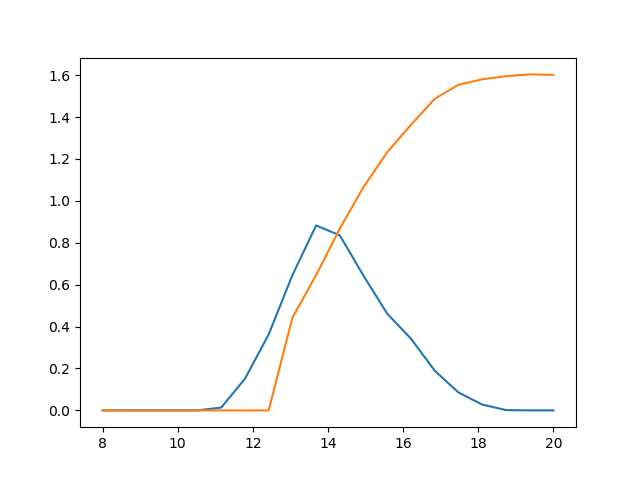

<IPython.core.display.Javascript object>


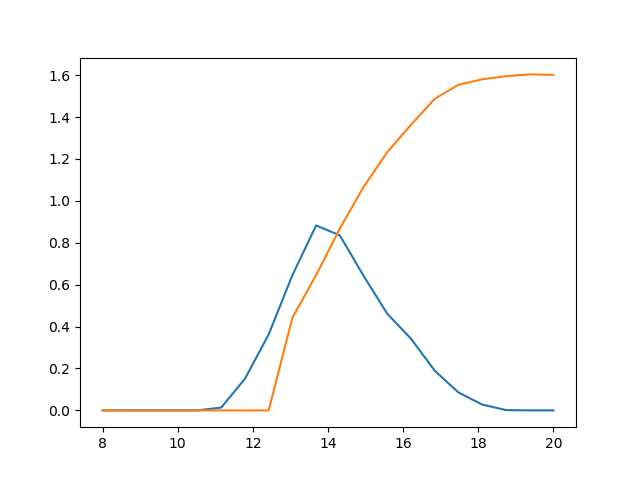

In [7]:
f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)
pm.display('mHcurves', f1)

In [8]:
np.max(Hp)/np.max(Mp)

0.55047422330630669

In [9]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.44269499],
       [ 0.64586538],
       [ 0.86817884],
       [ 1.06643465],
       [ 1.23247361],
       [ 1.36368067],
       [ 1.4871271 ],
       [ 1.55434791],
       [ 1.58024606],
       [ 1.59514479],
       [ 1.60362525],
       [ 1.60135092]])

<IPython.core.display.Javascript object>


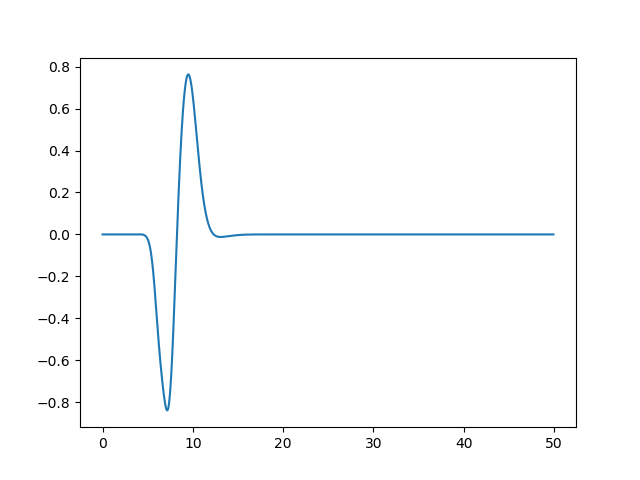

<IPython.core.display.Javascript object>


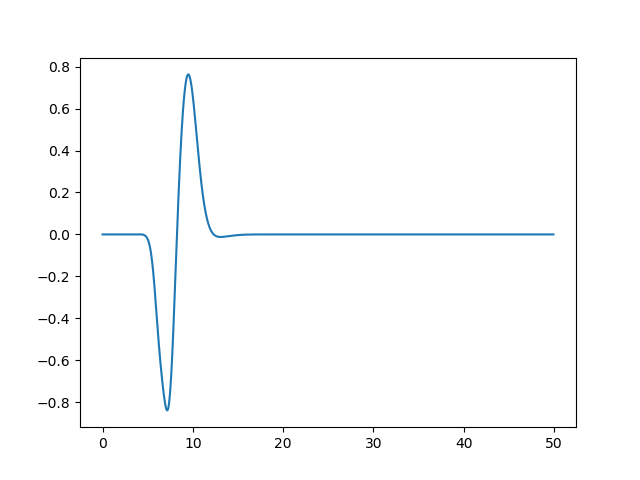

In [10]:
f2 = plt.figure()
plt.plot(t, emg[:,19])
pm.display('mhsignal', f2)

In [11]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


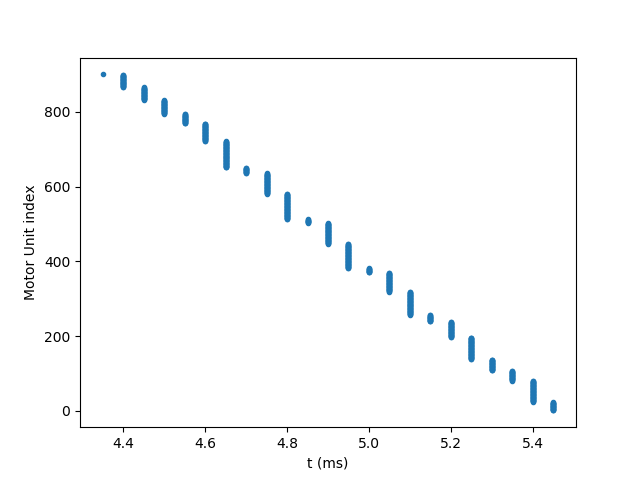

<IPython.core.display.Javascript object>


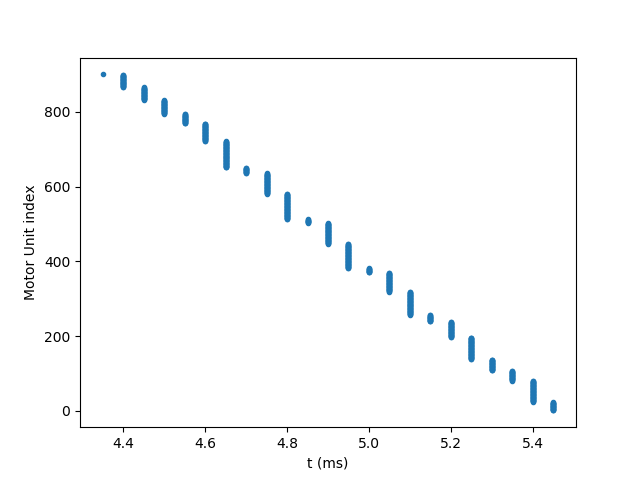

In [12]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
    sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
pm.display('MNspikes', f3)

In [13]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)